#### Data Load

In [1]:
%pylab inline
import umap

Populating the interactive namespace from numpy and matplotlib


In [2]:
ids=[]
projects=[]
FirstBatch=open("Proj_UID.csv","r")

for line in FirstBatch:
    line=line.strip("\n").split(";")
    ids.append(line[0])
    projects.append(line[1])

In [3]:
SecondBatch=open("Proj_UIDBatch2.csv","r")

for line in SecondBatch:
    line=line.strip("\n").split(";")
    
    if line[0] in ids:
        continue
    else:
        ids.append(line[0])
    projects.append(line[1])

In [4]:
#for (ID,proj) in zip(ids,projects):
#    print(ID+";"+proj)

In [5]:
phy=open("NewDistances.tab","r")

distances=np.zeros((1617,1617))

for line in phy:
    line=line.strip("\n").split("\t")
    id1=line[0].split("_")[0].split("/")[1]
    id2=line[1].split("_")[0].split("/")[1]
    dist=float(line[2])
    
    distances[ids.index(id1),ids.index(id2)]=dist
    distances[ids.index(id2),ids.index(id1)]=dist
phy.close()

In [6]:
Ordprojects=list(set(projects))
print(len(Ordprojects))

776


In [7]:
col=[]

for i in projects:
    col.append(Ordprojects.index(i))

In [8]:
UnOrdprojects=projects
projects=Ordprojects

#### Data Load (Keywords and MeSH)

In [9]:
fpapers=open("Papers-Grid_Min.csv","r",encoding="utf-8")

ProjforKeywords=[]
keywords=[]

for line in fpapers:
    if "PRJNA" in line:
        line=line.strip("\n").split('PRJNA')
        projectID="PRJNA"+line[1].split(",")[0].split(";")[0].split(".pdf")[0].split(")")[0]
        if projectID in projects:
            ProjforKeywords.append(projectID)
            Prelkeywords=line[1].split(",")[1::]
            #print(Prelkeywords)
            Realkeywords=[]
            for i in Prelkeywords:
                #print(i.lower())
                if i=="":
                    continue
                else:
                    Realkeywords.append(i.lower())
            keywords.append(Realkeywords)
fpapers.close()

In [10]:
kwordtoProj={}

for i in range(len(keywords)):
    for j in keywords[i]:
        if j in kwordtoProj.keys():
            kwordtoProj[j].append(ProjforKeywords[i])
        else:
             kwordtoProj[j]=[ProjforKeywords[i]]

In [11]:
MeShTerms=open("MeSHTerms.csv","r",encoding="utf-8")

ProjforMeSH=[]
MesHMaj=[]
MesHMin=[]
Currentproject="PRJNA450123"
thisMaj=[]
tempMin=[]

while True:
    line = MeShTerms.readline()
    if line is None or line=='':
        break
    else:
        line=line.strip("\n").split(";")
        if line[1]==Currentproject:
            thisMaj.append(line[2])
            thisMin=[]
            for i in range(3,len(line)):
                if line[i]!="":
                    thisMin.append(line[i])
            tempMin.append(thisMin)
        else:
            MesHMaj.append(thisMaj)
            MesHMin.append(tempMin)
            Currentproject=line[1]
            ProjforMeSH.append(line[1])
            thisMaj=[line[2]]
            tempMin=[]
            thisMin=[]
            for i in range(3,len(line)):
                if line[i]!="":
                    thisMin.append(line[i])
            tempMin.append(thisMin)
    
MeShTerms.close()

In [12]:
MajMeSHtoProj={}
MinMeSHtoProj={}

for i in range(len(MesHMaj)):
    for j in range(len(MesHMaj[i])):
        if MesHMaj[i][j] in MajMeSHtoProj.keys():
            MajMeSHtoProj[MesHMaj[i][j]].append(ProjforMeSH[i])
        else:
             MajMeSHtoProj[MesHMaj[i][j]]=[ProjforMeSH[i]]
        for z in MesHMin[i][j]:
            if MesHMaj[i][j]+"_"+z in MinMeSHtoProj.keys():
                MinMeSHtoProj[MesHMaj[i][j]+"_"+z].append(ProjforMeSH[i])
            else:
                MinMeSHtoProj[MesHMaj[i][j]+"_"+z]=[ProjforMeSH[i]]

#### Abundant Terms Tables (by BioProject)

In [13]:
def sortbyAbundance(dictionary):
    AbKey=[]
    for i in dictionary.keys():
        AbKey.append(len(dictionary[i]))
    return [x for _,x in sorted(zip(AbKey,dictionary.keys()))]

In [14]:
ordered_keywords=sortbyAbundance(kwordtoProj)
print("Keywords"+"\t"+"Abundance (Projects)")
print("=========================================")
for i in range(1,11):
    print(ordered_keywords[-i]+"\t"+str(len(kwordtoProj[ordered_keywords[-i]])))

Keywords	Abundance (Projects)
unclassified sequences	237
ecological metagenomes	200
metagenomes	192
coal metagenome	130
seawater metagenome	87
enriched cells	78
powder river basin	71
organismal metagenomes	65
soil metagenome	63
sorted cell/s	62


In [15]:
ordered_MajMesh=sortbyAbundance(MajMeSHtoProj)
print("Major MeSH"+"\t"+"Abundance (Projects)")
print("=========================================")
for i in range(1,11):
    print(ordered_MajMesh[-i]+"\t"+str(len(MajMeSHtoProj[ordered_MajMesh[-i]])))

Major MeSH	Abundance (Projects)
Animals	17
Microbiota	14
RNA, Ribosomal, 16S	11
Bacteria	10
Gastrointestinal Microbiome	9
Humans	7
Male	6
Female	5
Mice	4
Metagenomics	4


In [16]:
ordered_MinMesh=sortbyAbundance(MinMeSHtoProj)
print("Minor_MeSH"+"\t"+"Abundance (Projects)")
print("=========================================")
for i in range(1,11):
    print(ordered_MinMesh[-i]+"\t"+str(len(MinMeSHtoProj[ordered_MinMesh[-i]])))

Minor_MeSH	Abundance (Projects)
RNA, Ribosomal, 16S_genetics	8
Bacteria_classification	7
Microbiota_genetics	6
Bacteria_isolation &amp	4
Bacteria_genetics	4
Bacteria_ purification	4
Gastrointestinal Microbiome_drug effects	3
DNA, Bacterial_genetics	3
Water Pollutants, Chemical_analysis	2
Waste Water_microbiology	2


#### Abundant Terms Tables (by Samples)

In [17]:
def sortbyAbSamples(dictionary):
    SampAbKey=[]
    for i in dictionary.keys():
        total=0
        for proj in dictionary[i]:
            total+=col.count(projects.index(proj))
        SampAbKey.append(total)
    OrdKey=[x for _,x in sorted(zip(SampAbKey,dictionary.keys()))]
    SampAbKey.sort()
    return OrdKey,SampAbKey

In [18]:
Sampleordered_keywords,SampleAbundanceKeyword=sortbyAbSamples(kwordtoProj)
print("Keywords"+"\t"+"Abundance (Samples)")
print("=========================================")
for i in range(1,11):
    print(Sampleordered_keywords[-i]+"\t"+str(SampleAbundanceKeyword[-i]))

Keywords	Abundance (Samples)
unclassified sequences	493
ecological metagenomes	339
metagenomes	287
organismal metagenomes	194
metagenome	150
coal metagenome	130
seawater metagenome	87
soil metagenome	82
enriched cells	78
powder river basin	71


In [19]:
Sampleordered_MajMesh,SampleAbundanceMajMeSH=sortbyAbSamples(MajMeSHtoProj)
print("Major MeSH"+"\t"+"Abundance (Samples)")
print("=========================================")
for i in range(1,11):
    print(Sampleordered_MajMesh[-i]+"\t"+str(SampleAbundanceMajMeSH[-i]))

Major MeSH	Abundance (Samples)
Microbiota	108
Animals	101
RNA, Ribosomal, 16S	72
Bacteria	66
Humans	46
Female	39
Gastrointestinal Microbiome	36
Male	33
Waste Water	28
Metagenome	26


In [20]:
Sampleordered_MinMesh,SampleAbundanceMinMeSH=sortbyAbSamples(MinMeSHtoProj)
print("Minor_MeSH"+"\t"+"Abundance (Samples)")
print("=========================================")
for i in range(1,11):
    print(Sampleordered_MinMesh[-i]+"\t"+str(SampleAbundanceMinMeSH[-i]))

Minor_MeSH	Abundance (Samples)
RNA, Ribosomal, 16S_genetics	52
Bacteria_classification	44
Microbiota_genetics	38
Bacteria_isolation &amp	37
Bacteria_ purification	37
Bacteria_metabolism	23
Waste Disposal, Fluid_methods	19
Bacteria_genetics	19
Waste Water_microbiology	18
Water Pollutants, Chemical_analysis	16


#### Search abstracts for keywords

In [21]:
abst=open("Abstracts.csv","r",encoding="utf-8")

while True:
    line = abst.readline()
    if line is None or line=='':
        break
    else:
        if "PRJNA" in line:
            line=line.strip("\n").split("PRJNA")
            projectID="PRJNA"+line[1].split(",")[0].split(";")[0].split(".pdf")[0].split(")")[0]
            if projectID in projects:
                #print(line[1])
                try:
                    text=line[1].split('"')[-2]
                    while '"' not in text:
                        for j in kwordtoProj.keys():
                            if j in text.lower() and projectID not in kwordtoProj[j]:
                                kwordtoProj[j].append(projectID)
                        text=abst.readline().strip("\n")
                except IndexError:
                    text=line[1].split(',')[-1]
                    for j in kwordtoProj.keys():
                            if j in text.lower() and projectID not in kwordtoProj[j]:
                                kwordtoProj[j].append(projectID)
abst.close()

In [22]:
ordered_keywords=sortbyAbundance(kwordtoProj)
print("Keywords"+"\t"+"Abundance (Projects)")
print("=========================================")
for i in range(1,51):
    print(ordered_keywords[-i]+"\t"+str(len(kwordtoProj[ordered_keywords[-i]])))

Keywords	Abundance (Projects)
unclassified sequences	237
ecological metagenomes	200
metagenomes	195
coal metagenome	130
coal bed	90
seawater metagenome	87
metatranscriptome	78
enriched cells	78
powder river basin	76
age	76
soil	73
organismal metagenomes	65
soil metagenome	63
sorted cell/s	62
microbiome	59
metagenome	56
sediment metagenome	46
soil microbial communities	43
root metagenome	43
sequencing	40
fungi	35
diversity	33
16s	33
16s rrna	30
peat metagenome	29
pathogen	28
bat	28
water microbiology	27
nitrate	27
dna	27
uncultured microbe	26
tropical soil microbial communities	26
ngs	25
microbiota	25
archaea	25
stable isotope probing	22
plant litter microbial communities	22
marine sediment metagenome	22
plant metagenome	21
metabolism	21
unialgal haptophyte culture	20
mixed culture metagenome	20
gut	20
chrysochromulina tobin	20
lake water metagenome	19
fjord	19
seawater microbial communities	18
endophytes	18
east loma ridge	18
symbiosis	17


In [23]:
Sampleordered_keywords,SampleAbundanceKeyword=sortbyAbSamples(kwordtoProj)
print("Keywords"+"\t"+"Abundance (Samples)")
print("=========================================")
for i in range(1,11):
    print(Sampleordered_keywords[-i]+"\t"+str(SampleAbundanceKeyword[-i]))

Keywords	Abundance (Samples)
unclassified sequences	493
ecological metagenomes	339
metagenomes	304
age	299
diversity	239
sequencing	233
metagenome	232
16s	223
16s rrna	208
organismal metagenomes	194


#### Consolidate keywords by presence of specific words

In [63]:
def getTerms(words,Dict):
    MatchWords=[]
    for j in range(len(words)):
        MatchWords.append([])
    for i in Dict.keys():
        for j in range(len(words)):
            if words[j] in i:
                MatchWords[j].append(i)                
    return MatchWords

In [64]:
getTerms(["seawater","gut"],kwordtoProj)

[['seawater metagenome',
  'seawater microbial communities',
  'seawater viral communities'],
 ['invertebrate gut metagenome',
  'human gut metagenome',
  'gut microbiome',
  'gut metagenome',
  'mouse gut metagenome',
  'gut microbiota',
  'chicken gut microbiota',
  'gut metabolites',
  'fish gut metagenomes',
  'gut',
  'bovine gut metagenome',
  'insect gut metagenome',
  'sheep gut metagenome']]

In [65]:
def consolidateTerms(words,Dict):
    newDict={}
    for i in words:
        newDict[i]=[]
    for i in Dict.keys():
        found=0
        for j in words:
            if j in i:
                newDict[j].extend(Dict[i])
                found=1
        if found==0:
            newDict[i]=Dict[i]
    return newDict

In [66]:
conskey=consolidateTerms(["seawater","gut"],kwordtoProj)

In [67]:
ordered_keywords=sortbyAbundance(conskey)
print("Consolidated Keywords"+"\t"+"Abundance (Projects)")
print("=========================================")
for i in range(1,51):
    print(ordered_keywords[-i]+"\t"+str(len(conskey[ordered_keywords[-i]])))

Consolidated Keywords	Abundance (Projects)
unclassified sequences	237
ecological metagenomes	200
metagenomes	195
coal metagenome	130
seawater	110
coal bed	90
metatranscriptome	78
enriched cells	78
powder river basin	76
age	76
soil	73
organismal metagenomes	65
gut	65
soil metagenome	63
sorted cell/s	62
microbiome	59
metagenome	56
sediment metagenome	46
soil microbial communities	43
root metagenome	43
sequencing	40
fungi	35
diversity	33
16s	33
16s rrna	30
peat metagenome	29
pathogen	28
bat	28
water microbiology	27
nitrate	27
dna	27
uncultured microbe	26
tropical soil microbial communities	26
ngs	25
microbiota	25
archaea	25
stable isotope probing	22
plant litter microbial communities	22
marine sediment metagenome	22
plant metagenome	21
metabolism	21
unialgal haptophyte culture	20
mixed culture metagenome	20
chrysochromulina tobin	20
lake water metagenome	19
fjord	19
endophytes	18
east loma ridge	18
symbiosis	17
sediment microbial communities	17


#### Modify Color Scheme based on given Keywords/MeSH Terms

In [24]:
def change_col(dictOne,words,all_col=0):
    colmap={}
    numMap={}
    z=20
    for j in words:
        colmap[j]=z
        numMap[z]=j
        z+=10
    new_cols=[]
    for i in range(len(col)):
        proj=projects[col[i]]
        if all_col==1:
            this_col=0
            for j in words:
                if proj in dictOne[j]:
                    this_col+=colmap[j]
            new_cols.append(this_col)
        else:
            found=0
            for j in words:
                if proj in dictOne[j]:
                    new_cols.append(colmap[j])
                    found=1
                    break
            if found==0:
                new_cols.append(2)
                
    return new_cols,colmap,numMap

In [25]:
ncol,thisColMap,NumMap=change_col(kwordtoProj,["gut microbiome","mechanism","pathogen","bacterial communities","viral","nitrogen-fixing consortium dg1","soil surface biofilm","plant litter microbial communities","chrysochromulina tobin","mixed culture metagenome"],0)

In [26]:
ncolForPlotNine=[]

for i in ncol:
    try:
        ncolForPlotNine.append(NumMap[i])
    except KeyError:
        ncolForPlotNine.append("None")

In [33]:
thisColMap

{'gut microbiome': 20,
 'mechanism': 30,
 'pathogen': 40,
 'bacterial communities': 50,
 'viral': 60,
 'nitrogen-fixing consortium dg1': 70,
 'soil surface biofilm': 80,
 'plant litter microbial communities': 90,
 'chrysochromulina tobin': 100,
 'mixed culture metagenome': 110}

## Clustering Analyses

#### UMAP

In [27]:
fit = umap.UMAP(n_components=2,metric="precomputed")
u = fit.fit_transform(distances)

C:\Users\jlego\anaconda3\lib\site-packages\umap\umap_.py:1503: UserWarning: using precomputed metric; transform will be unavailable for new data and inverse_transform will be unavailable for all data
  warn(


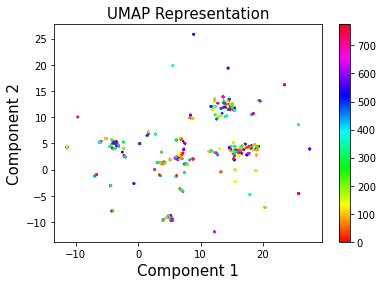

In [26]:
scatter(u[:,0],u[:,1],s=2,c=col,cmap="hsv")
#scatter(u[:,0],u[:,1],s=ncol,c=ncol,cmap="tab20c")
colorbar()
title("UMAP Representation",fontsize=15)
xlabel("Component 1",fontsize=15)
ylabel("Component 2",fontsize=15)
figsize(20,10)

In [27]:
import pandas as pd

df=pd.DataFrame(u,columns=["Coord1","Coord2"])
df['Bioproj']=col

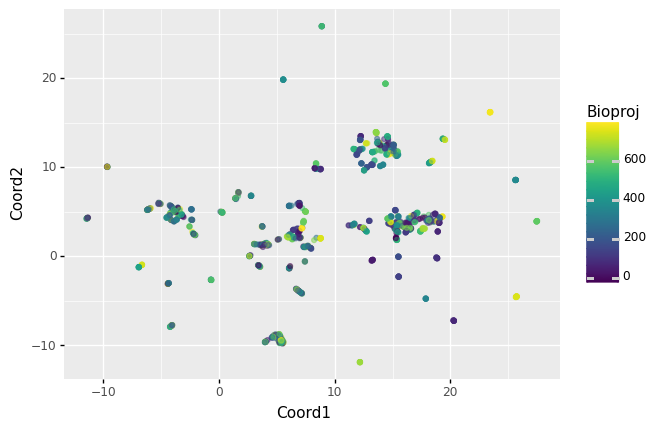

<ggplot: (129058896354)>

In [28]:
from plotnine import *

(ggplot(df, aes(x='Coord1', y='Coord2', color='Bioproj')) +
        geom_point(alpha = 0.5)
)

In [34]:
import pandas as pd

df=pd.DataFrame(u,columns=["Coord1","Coord2"])
df['Terms']=ncolForPlotNine

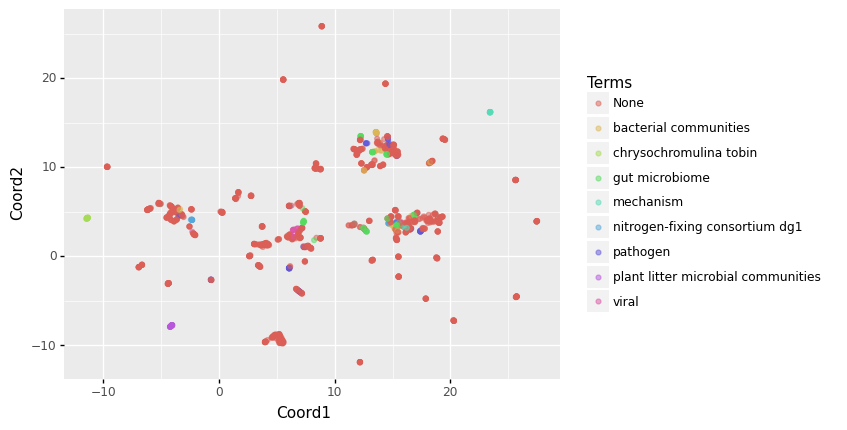

<ggplot: (129055346405)>

In [35]:
from plotnine import *

(ggplot(df, aes(x='Coord1', y='Coord2', color='Terms')) +
        geom_point(alpha = 0.5)
)

#### dbSCAN

In [28]:
def filterGroups(colList,OrigCol):
    NewCol=[]
    for i in OrigCol:
        if i in colList:
            NewCol.append(str(i))
        else:
            NewCol.append(str(-1))
    return NewCol

In [29]:
from sklearn.cluster import DBSCAN
dbg=DBSCAN(eps=0.1,metric="precomputed",min_samples=10).fit(distances)

In [30]:
dbscanCols=[]
for i in dbg.labels_:
    if i==-1:
        dbscanCols.append(0)
    elif i==0:
        dbscanCols.append(25*10)
    else:
        if (i+1)%2==0:
            dbscanCols.append((i+1)*10)
        else:
            dbscanCols.append((i+1)*-10)

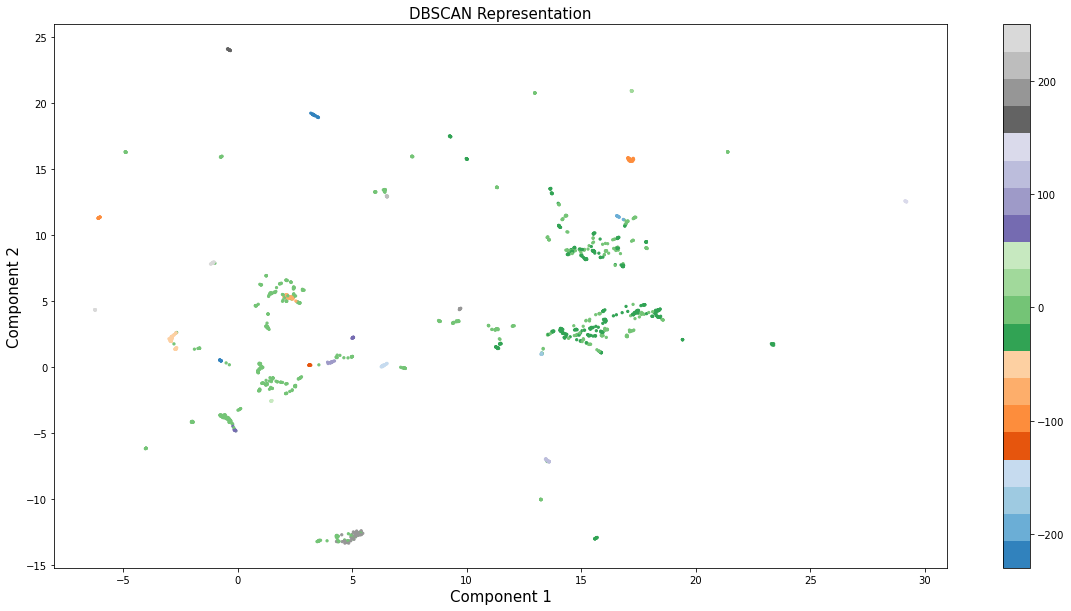

In [35]:
scatter(u[:,0],u[:,1],s=5,c=dbscanCols,cmap="tab20c")
colorbar()
title("DBSCAN Representation",fontsize=15)
xlabel("Component 1",fontsize=15)
ylabel("Component 2",fontsize=15)
figsize(20,10)

In [36]:
from sklearn.cluster import DBSCAN
dbg=DBSCAN(eps=0.1,metric="precomputed",min_samples=10).fit(distances)

In [46]:
import pandas as pd

dfDBSC=pd.DataFrame(u,columns=["Coord1","Coord2"])
strLabels=[str(x) for x in list(dbg.labels_)]
#dfDBSC['Clusters']=dbg.labels_
dfDBSC['Clusters']=strLabels
#dfDBSC['Clusters']=filterGroups([0,1],dbg.labels_)

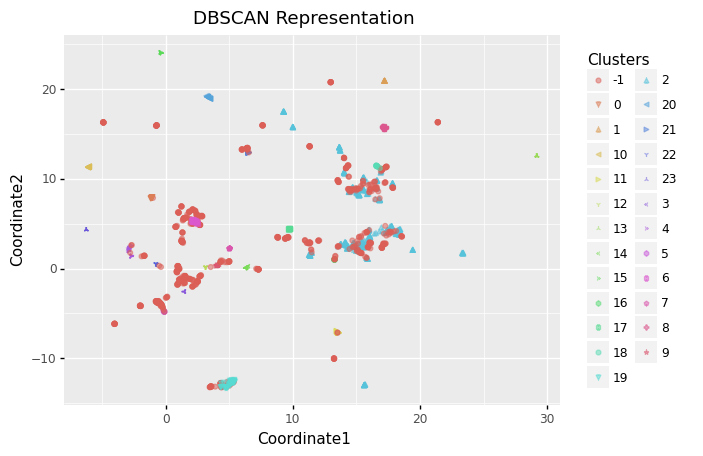

<ggplot: (105548409468)>

In [47]:
from plotnine import *

(ggplot(dfDBSC, aes(x='Coord1', y='Coord2', color='Clusters', shape='Clusters')) +
        geom_point(alpha = 0.5) + labs(title="DBSCAN Representation", x="Coordinate1", y="Coordinate2") + 
 scale_shape_manual(values=asarray(["o","v","^","<",">","1","2","3","4","8","s","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",1,2,3,4,5]))
)

#### hdbSCAN

In [39]:
import hdbscan
hdbg=hdbscan.HDBSCAN(eps=0.1,metric="precomputed",min_samples=10)
cluster_labels = hdbg.fit_predict(distances)

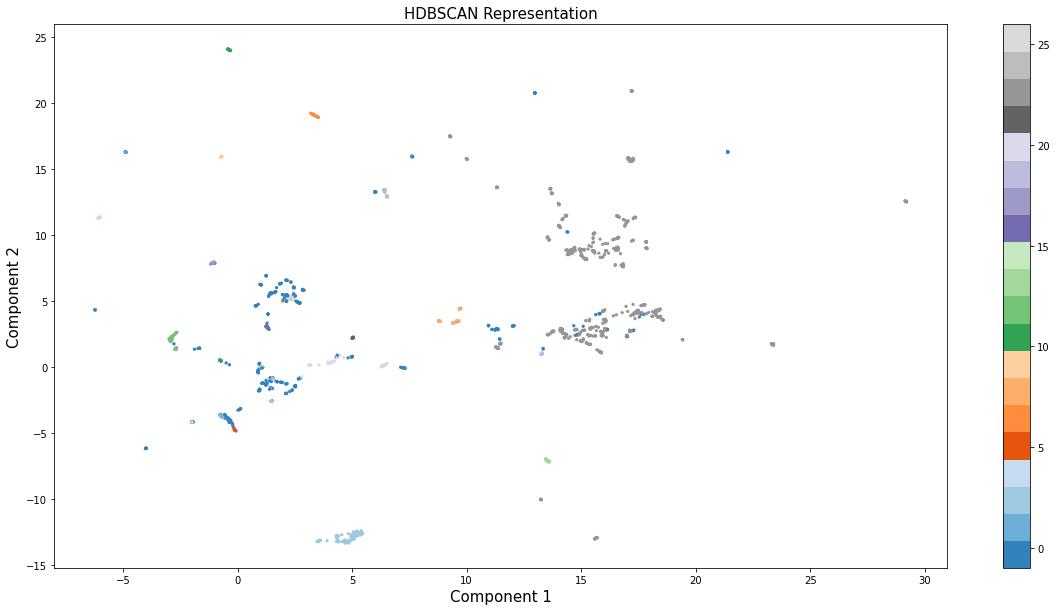

In [40]:
scatter(u[:,0],u[:,1],s=5,c=cluster_labels,cmap="tab20c")
colorbar()
title("HDBSCAN Representation",fontsize=15)
xlabel("Component 1",fontsize=15)
ylabel("Component 2",fontsize=15)
figsize(20,10)

In [41]:
import hdbscan
hdbg=hdbscan.HDBSCAN(eps=0.1,metric="precomputed",min_samples=10)
cluster_labels = hdbg.fit_predict(distances)

In [44]:
import pandas as pd

dfHDBSC=pd.DataFrame(u,columns=["Coord1","Coord2"])
dfHDBSC['Clusters']=[str(x) for x in list(cluster_labels)]
#dfHDBSC['Clusters']=filterGroups([2,3,4,5,6],cluster_labels)

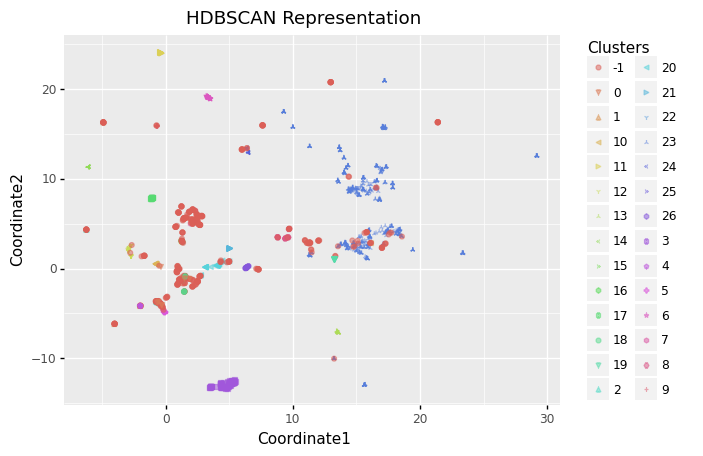

<ggplot: (105548401860)>

In [45]:
from plotnine import *

from plotnine import *

(ggplot(dfHDBSC, aes(x='Coord1', y='Coord2', color='Clusters', shape='Clusters')) +
        geom_point(alpha = 0.5) + labs(title="HDBSCAN Representation", x="Coordinate1", y="Coordinate2") + 
 scale_shape_manual(values=asarray(["o","v","^","<",">","1","2","3","4","8","s","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",1,2,3,4]),expand=(1,0))
)

#### Test for Keyword/MeSH Enrichment in Clusters

In [60]:
def TotalTermAbundance(term,termDict):
    this_projects=termDict[term]
    total=0
    for i in this_projects:
        total+=col.count(projects.index(i))
    return total

In [59]:
from scipy.stats import binom_test

def getSigTerms(clusters,TermDict,ProjList,TermList):
    clustersPos=[]
    numClusters=max(clusters)-min(clusters)+1
    for i in range(numClusters):
        clustersPos.append([])
    for i in range(len(clusters)):
        clustersPos[(clusters[i]+1)].append(i)
    
    clust=0
    AllClusterTerms=[]
    AllTermAbundances=[]
    while clust<=(max(clusters)+1):
        ClusterTerms=[]
        for member in clustersPos[clust]:
            this_proj=projects[col[member]]
            try:
                for term in TermList[ProjList.index(this_proj)]:
                
                    if term not in ClusterTerms:
                        ClusterTerms.append(term)
            except: 
                pass
        AllClusterTerms.append(ClusterTerms)
        clust+=1
        
    bonfCorrect=0
    for j in AllClusterTerms:
        bonfCorrect+=len(j)
    
    clust=0
    EnrichedAll={}
    SizeAll={}
    while clust<=(max(clusters)+1):
        EnrichedThis=[]
        SizeThis={}
        for term in AllClusterTerms[clust]:
            amount=0
            for member in clustersPos[clust]:
                if projects[col[member]] in TermDict[term]:
                    amount+=1
            binomial=binom_test(x=amount, n=len(clustersPos[clust]),p=TotalTermAbundance(term,TermDict)/len(col))
            if binomial<0.01/(2*bonfCorrect):
                EnrichedThis.append(term)
                SizeThis[term]=amount
        realClust=clust-1
        EnrichedAll[realClust]=EnrichedThis
        SizeAll[realClust]=SizeThis
        clust+=1
    
    return EnrichedAll,SizeAll

In [175]:
enrichedKeywords,sizeKey=getSigTerms(dbg.labels_,kwordtoProj,ProjforKeywords,keywords)
enrichedMajMeSH,sizeMahMeSH=getSigTerms(dbg.labels_,MajMeSHtoProj,ProjforMeSH,MesHMaj)

print("Cluster"+"\t"+"Term"+"\t"+"Type"+"\t"+"Abundance"+"\t"+"Cluster_Size"+"\t"+"Total Abundance")

clusters=max(dbg.labels_)-min(dbg.labels_)+1
for i in range(-1,clusters):
    Pos=i+1
    try:
        for term in enrichedKeywords[i]:
            print(str(i)+"\t"+term+"\t"+"Keyword"+"\t"+str(sizeKey[i][term])+"\t"+str(list(dbg.labels_).count(i))+"\t"+str(TotalTermAbundance(term,kwordtoProj))+"\n")
    except KeyError:
        pass
    try:
        for term in enrichedMajMeSH[i]:
            print(str(i)+"\t"+term+"\t"+"MeSH"+"\t"+str(sizeMahMeSH[i][term])+"\t"+str(list(dbg.labels_).count(i))+"\t"+str(TotalTermAbundance(term,MajMeSHtoProj))+"\n")
    except KeyError:
        pass

Cluster	Term	Type	Abundance	Cluster_Size	Total Abundance
-1	water microbiology	Keyword	14	180	27

-1	soil	Keyword	12	180	18

-1	unclassified sequences	Keyword	23	180	493

-1	seawater metagenome	Keyword	65	180	87

-1	canine circovirus	Keyword	9	180	9

-1	viral diversity	Keyword	9	180	9

-1	ticks	Keyword	9	180	9

-1	paralysis	Keyword	9	180	9

-1	dog	Keyword	9	180	9

-1	china	Keyword	9	180	9

-1	sorted cell/s	Keyword	62	180	62

-1	uncultured microbe	Keyword	26	180	26

0	metagenomes	Keyword	64	175	287

0	ecological metagenomes	Keyword	73	175	339

0	lake water metagenome	Keyword	18	175	33

0	peat metagenome	Keyword	29	175	29

0	soil metagenome	Keyword	32	175	82

0	soil microbial communities	Keyword	10	175	12

0	peat permafrost microbial communities	Keyword	13	175	13

0	tropical soil microbial communities	Keyword	26	175	26

0	stable isotope probing	Keyword	22	175	22

0	sediment metagenome	Keyword	27	175	49

1	metagenome	Keyword	102	697	150

1	metagenomes	Keyword	76	697	287

1	16s rrna	Keywor

In [61]:
enrichedKeywords,sizeKey=getSigTerms(cluster_labels,kwordtoProj,ProjforKeywords,keywords)
nrichedMajMeSH,sizeMahMeSH=getSigTerms(cluster_labels,MajMeSHtoProj,ProjforMeSH,MesHMaj)

print("Cluster"+"\t"+"Term"+"\t"+"Type"+"\t"+"Abundance"+"\t"+"Cluster_Size"+"\t"+"Total Abundance")

clusters=max(dbg.labels_)-min(dbg.labels_)+1
for i in range(-1,clusters):
    Pos=i+1
    try:
        for term in enrichedKeywords[i]:
            print(str(i)+"\t"+term+"\t"+"Keyword"+"\t"+str(sizeKey[i][term])+"\t"+str(list(dbg.labels_).count(i))+"\t"+str(TotalTermAbundance(term,kwordtoProj))+"\n")
    except KeyError:
        pass
    try:
        for term in enrichedMajMeSH[i]:
            print(str(i)+"\t"+term+"\t"+"MeSH"+"\t"+str(sizeMahMeSH[i][term])+"\t"+str(list(dbg.labels_).count(i))+"\t"+str(TotalTermAbundance(term,MajMeSHtoProj))+"\n")
    except KeyError:
        pass

Cluster	Term	Type	Abundance	Cluster_Size	Total Abundance
-1	root metagenome	Keyword	1	180	58



NameError: name 'enrichedMajMeSH' is not defined

## Distance Analyses

#### Mash Distance Analysis (All BioProjects)

In [29]:
group_distances=[]
diff_distances=[]

for i in range(1,distances.shape[0]):
    for j in range(0,i):
        if col[i]==col[j]:
            #if distances[i,j]==1.0:
                #print(i)
                #print(j)
                #print("===")
            group_distances.append(distances[i,j])
        else:
            #if distances[i,j]<0.1:
                #print(i)
                #print(j)
                #print("===")
            diff_distances.append(distances[i,j])

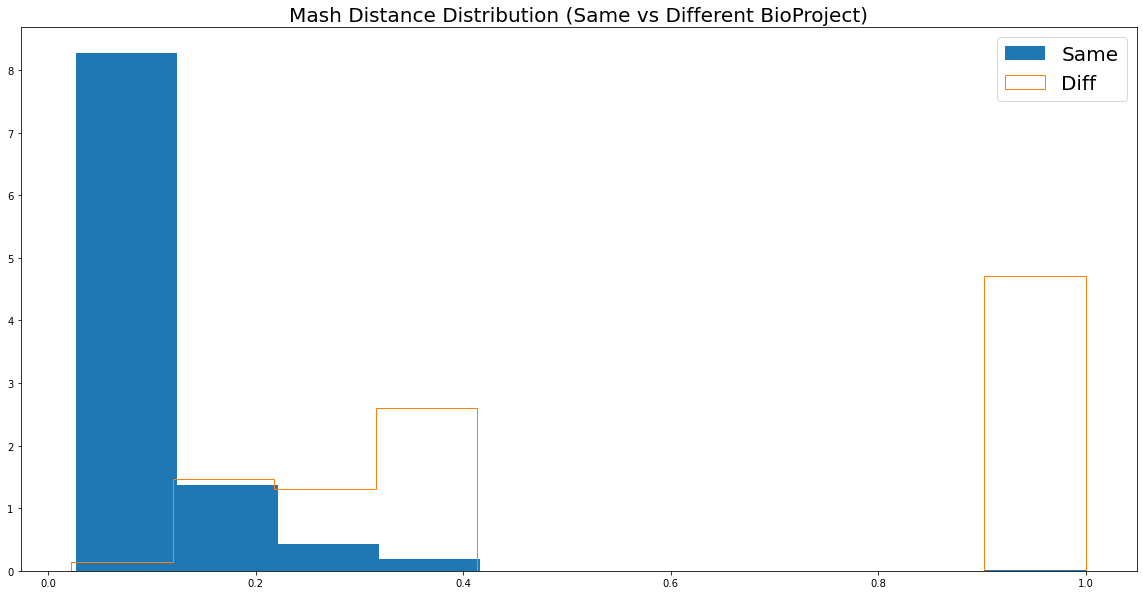

In [30]:
hist(group_distances,histtype='bar',label="Same", density=True)
hist(diff_distances,histtype='step',label="Diff", density=True)
title("Mash Distance Distribution (Same vs Different BioProject)", fontsize=20)
legend(prop={'size': 20})

In [31]:
from scipy.stats import ranksums,kstest

print(ranksums(group_distances,diff_distances))

print(kstest(group_distances,diff_distances))

RanksumsResult(statistic=-98.18862897166156, pvalue=0.0)
KstestResult(statistic=0.8368871504545193, pvalue=0.0)


#### Mash Distance Analysis (Keywords/MeSH Terms)

In [34]:
group_distances=[]
diff_distances=[]

for i in range(1,distances.shape[0]):
    for j in range(0,i):
        if ncol[i]==ncol[j]:
            #if distances[i,j]==1.0:
                #print(i)
                #print(j)
                #print("===")
            group_distances.append(distances[i,j])
        else:
            #if distances[i,j]<0.1:
                #print(i)
                #print(j)
                #print("===")
            diff_distances.append(distances[i,j])

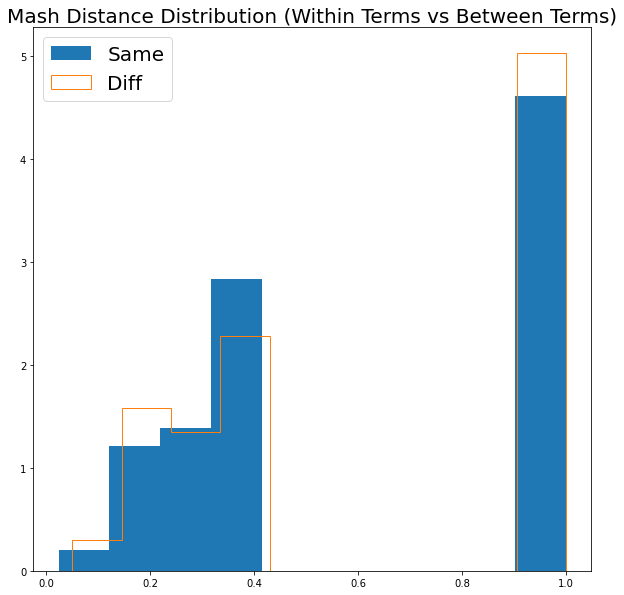

In [35]:
hist(group_distances,histtype='bar',label="Same", density=True)
hist(diff_distances,histtype='step',label="Diff", density=True)
title("Mash Distance Distribution (Within Terms vs Between Terms)", fontsize=20)
legend(prop={'size': 20})

In [36]:
from scipy.stats import ranksums,kstest

print(ranksums(group_distances,diff_distances))

print(kstest(group_distances,diff_distances))

RanksumsResult(statistic=-11.084708783413681, pvalue=1.4883393170118953e-28)
KstestResult(statistic=0.027448891609998527, pvalue=8.373346230555058e-71)


#### Test for Significant Differences in Clustering for Keywords

In [26]:
import statistics 
import random
def aleatorizationForTerms(dist,times,labels):
    differences=[]
    newlabels=labels
    for i in range(0,times):
        random.shuffle(newlabels)
        group_distances=[]
        diff_distances=[]

        for i in range(1,dist.shape[0]):
            for j in range(0,i):
                if newlabels[i]==newlabels[j]:
                    group_distances.append(dist[i,j])
                else:
                    diff_distances.append(dist[i,j])
        differences.append(statistics.median(diff_distances)-statistics.median(group_distances))
    differences.sort()
    return differences

In [31]:
from scipy.stats import ranksums,kstest
significant=[]
abSignificant=[]
abundance=[]
for term in kwordtoProj.keys():
    abundance.append(len(kwordtoProj[term]))
    if len(kwordtoProj[term])<5:
        continue
    print(term)
    ncol,thisColMap,Wol=change_col(kwordtoProj,[term],0)
    group_distances=[]
    diff_distances=[]

    for i in range(1,distances.shape[0]):
        for j in range(0,i):
            if ncol[i]==ncol[j]:
                group_distances.append(distances[i,j])
            else:
                diff_distances.append(distances[i,j])
    a,b=ranksums(group_distances,diff_distances)
    c,d=kstest(group_distances,diff_distances)
    actual_diff=statistics.median(diff_distances)-statistics.median(group_distances)
    Randdiff=aleatorizationForTerms(distances,1000,ncol)
    SignPos=int((len(Randdiff)*0.01))
    if b<0.01/(2*len(kwordtoProj)) and d<0.01/(2*len(kwordtoProj)) and Randdiff[SignPos]>actual_diff:
        abSignificant.append(len(kwordtoProj[term]))
        significant.append(term)
        print(term+"\t"+str(len(kwordtoProj[term])))

microbiota
ophiocordyceps
cicadas
parasitic fungi
symbiotic fungi
16s rrna
microbiome
unclassified sequences
metagenome
organismal metagenomes
root metagenome
archaea
ecological metagenomes
soil metagenome
human gut metagenome
seawater metagenome
gut microbiome
endophytes
ngs
diet
metagenomic sequencing
methane production
metagenomes
dna
rhizosphere
greenhouse
rhizosphere metagenome
mercury
chicken
gut microbiota
marine metagenome
16s
sediment metagenome
age
bacterial diversity
edna
rhodopseudomonas palustris
escherichia coli
static coculture
diversity
lake water metagenome
mechanism
feces metagenome
ammonia
metatranscriptome
pinus banksiana
aeciospores
endocronartium harknessii
salt marsh
fungus metagenome
cenococcum
lateral roots
mycorrhiza
plant metagenome
bat
metagenomic
sequencing
illumina
pathogen
hot springs metagenome
fungi
metabolism
bacterial communities
viral
gut
marine sediment metagenome
coal metagenome
peat metagenome
shoot metagenome
phosphate
nitrate
fjord
metagenomics


Text(0, 0.5, 'Frequency')

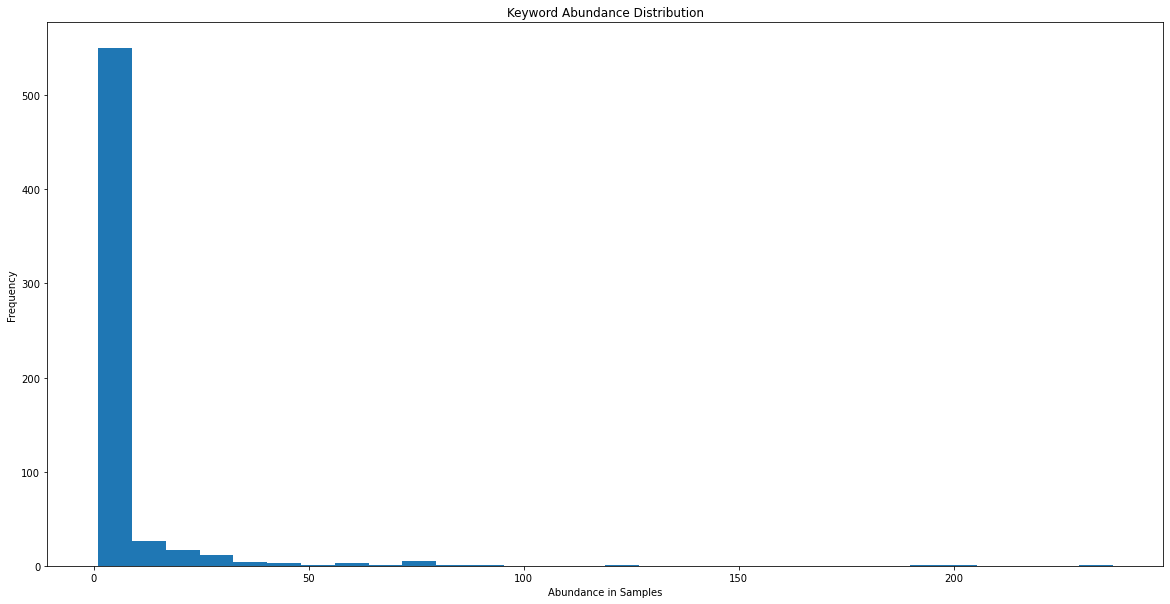

In [36]:
hist(abundance,histtype='bar', density=False,bins=30,)
title("Keyword Abundance Distribution")
xlabel("Abundance in Samples")
ylabel("Frequency")

In [19]:
abMeSH=[]
for i in MajMeSHtoProj.keys():
    abMeSH.append(len(MajMeSHtoProj[i]))

Text(0, 0.5, 'Frequency')

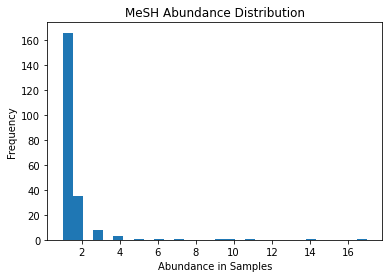

In [20]:
hist(abMeSH,histtype='bar', density=False,bins=30,)
title("MeSH Abundance Distribution")
xlabel("Abundance in Samples")
ylabel("Frequency")

#### Generate Metadata Table

In [23]:
keyIn=[]
for i in kwordtoProj.keys():
    if len(kwordtoProj[i])>4:
        keyIn.append(i)

table=open("DraftMetadata.tab","w")
header="id;Project"
for i in keyIn:
    header=header+"\t"+i
for j in MajMeSHtoProj:
    header=header+"\t"+j
table.write(header+"\n")

for i in range(len(ids)):
    line=str(ids[i])+"\t"+projects[col[i]]
    for z in keyIn:
        if projects[col[i]] in kwordtoProj[z]:
            line=line+"\t"+"Yes"
        else:
            line=line+"\t"+"No"
    for j in MajMeSHtoProj:
        if projects[col[i]] in MajMeSHtoProj[j]:
            line=line+"\t"+"Yes"
        else:
            line=line+"\t"+"No"
    table.write(line+"\n")
table.close()